In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [73]:
def radial_coords(stim_radius, n_stims, ring, angle=0, dynamic=False):
    if n_stims%2:
        n_stims -= 1
    offset_scaling = n_stims if dynamic else {'inner':10, 'outer':13}[ring]
    coord_offset = ((stim_radius) / np.sqrt(3)) * (offset_scaling/3)
    coord_radius = coord_offset * (offset_scaling/3)
    coord_degrees = np.array([(_ * (360 / n_stims) + angle) % 360 for _ in range(n_stims)])
    coords = np.column_stack((coord_radius * np.sin(np.deg2rad(coord_degrees)),
                              coord_radius * np.cos(np.deg2rad(coord_degrees))))

    return np.round(coords, 3).tolist()

In [67]:
def plot_radial_circles(stim_radius, n_stims, ring, angle=0, dynamic=False):
    n_stims_2 = n_stims+3
    ring_2 = 'outer'
    coords_inner = radial_coords(stim_radius, n_stims, ring, angle, dynamic)
    coords_outer = radial_coords(stim_radius, n_stims_2, ring_2, angle, dynamic)
    coords = coords_inner + coords_outer
    fig, ax = plt.subplots()
    for x, y in coords:
        circle = Circle((x, y), stim_radius, edgecolor='black', facecolor='none', linewidth=1)
        ax.add_patch(circle)
    
    ax.set_aspect('equal')
    ax.set_xlim(-max([abs(x) for x, y in coords_outer])-stim_radius, max([abs(x) for x, y in coords_outer])+stim_radius)
    ax.set_ylim(-max([abs(y) for x, y in coords_outer])-stim_radius, max([abs(y) for x, y in coords_outer])+stim_radius)
    plt.grid(True)
    plt.show()

In [25]:
def radGrid(stim_radius, n_stims):
	pOff = (2 * stim_radius) / np.sqrt(3)
	rList = [10]

	while sum(rList) <= n_stims:
		rList.append(rList[-1] + 6)
	nList = rList[:-1]
	nList.append(n_stims - sum(nList))
	radGrid = []

	for index, val in enumerate(nList):
		n = rList[index]
		cRad = pOff * (n / 3)
		degs = np.array([(i * (360 / val) + 90) % 360 for i in range(val)])
		cords = np.column_stack((cRad * np.cos(np.deg2rad(degs)), cRad * np.sin(np.deg2rad(degs))))
		radGrid.extend(np.round(cords, 3))

	return radGrid

In [12]:
def plot_radial_circles(stim_radius, n_stims, angle=0, dynamic=False):
    n_stims_2 = n_stims+3
    ring_2 = 'outer'
    coords = radGrid(stim_radius, n_stims)

    fig, ax = plt.subplots()

    for x, y in coords:
      circle = Circle((x, y), stim_radius, edgecolor='black', facecolor='none', linewidth=1)
      ax.add_patch(circle)
    
    ax.set_aspect('equal')
    ax.set_xlim(-max([abs(x) for x, y in coords])-stim_radius, max([abs(x) for x, y in coords])+stim_radius)
    ax.set_ylim(-max([abs(y) for x, y in coords])-stim_radius, max([abs(y) for x, y in coords])+stim_radius)
    plt.grid(True)
    plt.show()

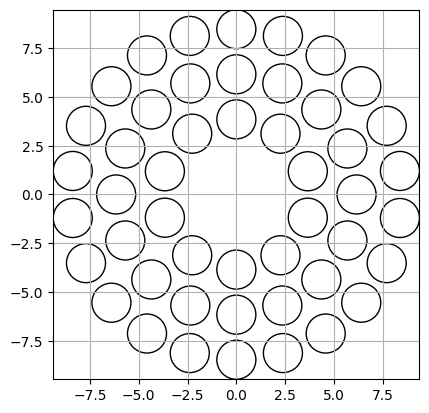

In [28]:
plot_radial_circles(stim_radius=1, n_stims=48)
